# XGBoost

In [24]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%store -r dataset_modelo

In [25]:
dataset_modelo = dataset_modelo.astype(float)
# Separando regressoras da variável resposta 
X, y = dataset_modelo.iloc[:,:-1],dataset_modelo.iloc[:,-1]

#Utilizando formato interpretável para o modelo de XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)


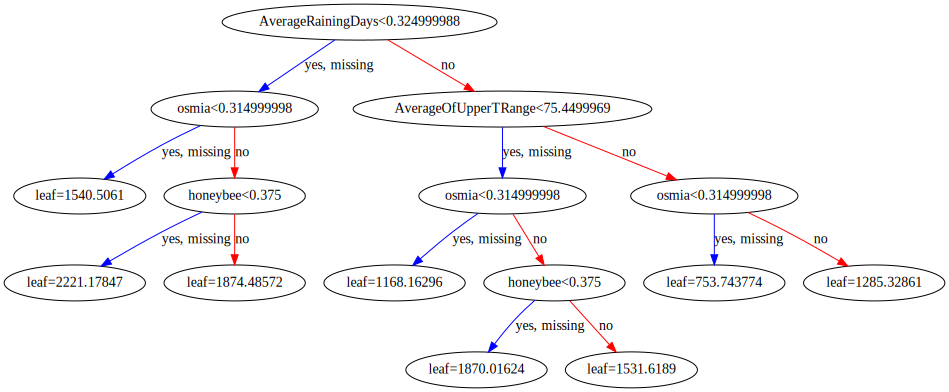

In [30]:
# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(eval_metric=mean_squared_error, n_estimators = 100, subsample = 0.9)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(xg_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

#print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

xg_reg.fit(X_train, y_train)

xgb.to_graphviz(xg_reg, num_trees=0)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

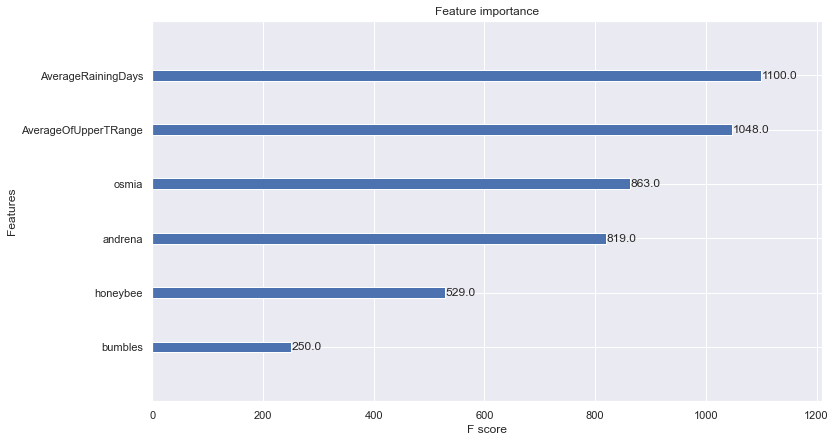

In [31]:

sns.set_theme()
sns.set_theme("notebook")
sns.set(rc={"figure.figsize": [12, 7]})

#Importância de cada Feature
xgb.plot_importance(xg_reg);

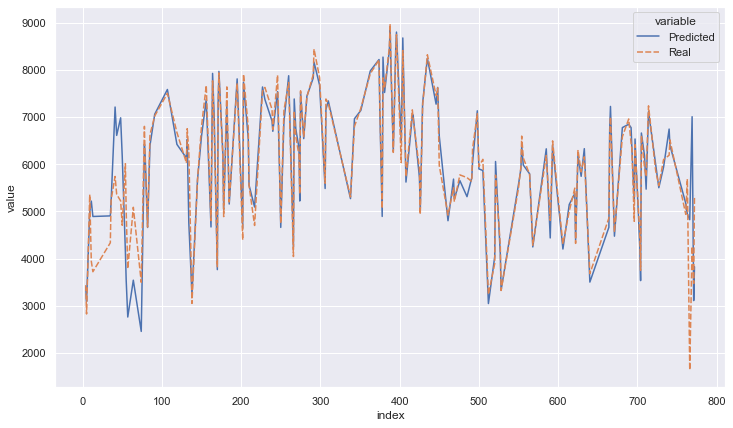

In [33]:
preds = xg_reg.predict(X_test)

finald = { "Predicted" : preds, "Real": y_test}

plotdata = pd.DataFrame(finald)

df_melted = plotdata.reset_index().melt(id_vars='index')

sns.lineplot(data = df_melted, x = "index", y = "value", style = "variable", hue = "variable");